# Basics of EDA using Python

## Loading Required Library and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import warnings # ignore warnings

In [2]:
iris_eda=pd.read_csv('Iris.csv')

In [3]:
iris_eda.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# To find number of rows and columns

iris_eda.shape

(150, 6)

# Univariate Analysis

#### Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.For example for SepalLengthcm variable see histogram

Text(0.5, 1.0, 'SepalLengthCm Distribution')

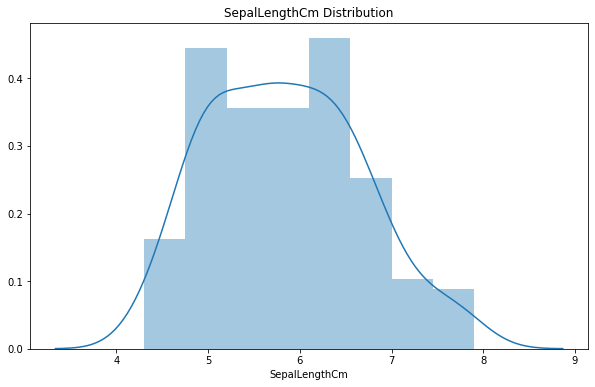

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(iris_eda['SepalLengthCm'])
plt.title('SepalLengthCm Distribution')

# Univariate Descriptive Statistics

### Some ways you can describe patterns found in univariate data include central tendency (mean, mode and median) and dispersion: variance, maximum, minimum, quartiles (including the interquartile range), and standard deviation. Let's start using describe() function to visualize this informations:


In [6]:
iris_eda['SepalLengthCm'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [7]:
# Calculating Mode

iris_eda['SepalLengthCm'].mode()

0    5.0
dtype: float64

In [8]:
# Calculating Variance

iris_eda['SepalLengthCm'].var()

0.6856935123042505

# Univariate Analysis with Charts

### We can also use charts to perform a univariate analysis and understand better one variable, for example we have line charts, histograms, boxplots, bar charts and pie charts, let's see each of then below.

# Line Charts

### The line chart is represented by a series of datapoints connected with a straight line. Line charts are most often used to visualize data that changes over time. With this type of chart we can quickly understand if our variable has a trend or if is stacionary.

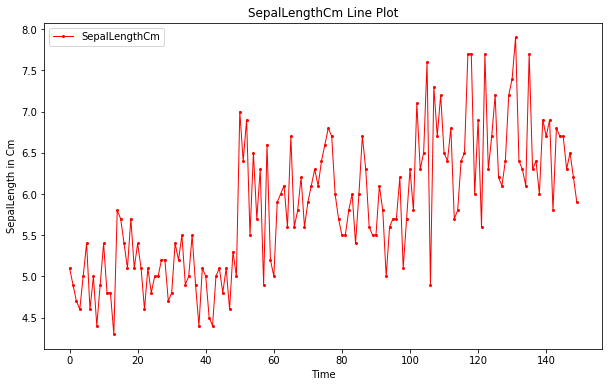

In [9]:
plt.figure(figsize=(10,6)) # defyning the plotsize

plt.plot(iris_eda['SepalLengthCm'] # defyning the data
         , color='red'# defyning the color
         ,label='SepalLengthCm'
         , marker='o' # defyning the type of marker, in this case, i use a dot
         ,linewidth=1 # defyning the line width
         , markersize=2) # defyning the markersize

plt.ylabel('SepalLength in Cm') # defyning ylabel title
plt.xlabel('Time') # defyning the xlabel title
plt.legend()
plt.title('SepalLengthCm Line Plot'); # defyning the title

# Histogram

A frequency distribution shows how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions.

Use a histogram when:

The data are numerical
You want to see the shape of the data’s distribution, especially when determining whether the output of a process is distributed approximately normally
Analyzing whether a process can meet the customer’s requirements
Analyzing what the output from a supplier’s process looks like
Seeing whether a process change has occurred from one time period to another
Determining whether the outputs of two or more processes are different
You wish to communicate the distribution of data quickly and easily to others

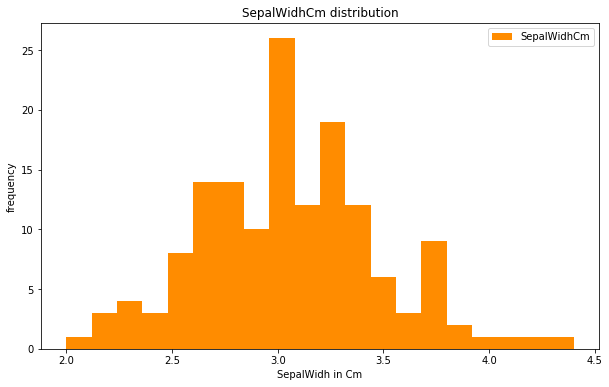

In [10]:
plt.figure(figsize=(10,6)) # creating the figure
plt.hist(iris_eda['SepalWidthCm'] # plotting the histogram
         ,bins=20 # defyning number of bars
         ,label='SepalWidhCm'# add legend
        ,color='darkorange') # defyning the color

plt.xlabel('SepalWidh in Cm') # add xlabel
plt.ylabel('frequency') # add ylabel
plt.legend()
plt.title('SepalWidhCm distribution');

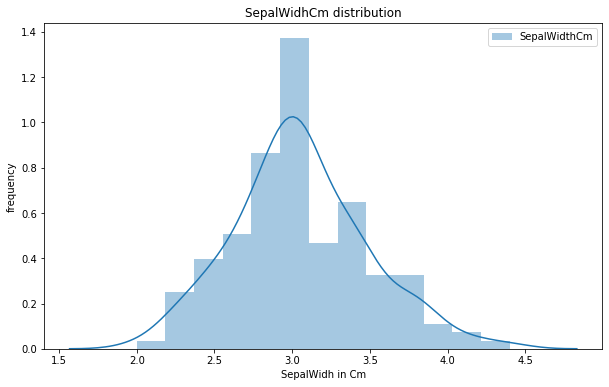

In [11]:
plt.figure(figsize=(10,6)) # difyning plt size
sns.distplot(iris_eda['SepalWidthCm']
            ,label='SepalWidthCm') # plotting distribution

plt.xlabel('SepalWidh in Cm') # add xlabel
plt.ylabel('frequency') # add ylabel
plt.legend()
plt.title('SepalWidhCm distribution');

# Box Plot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

# Interquartile Range

IQR is simple the diference between Q3(25th percentile) and Q1(75th percentile), this metric can be use to find outliers in a variable, values above (Q3+1.5 IQR) and values below (Q1-1.5 IQR) are considered outliers, in a boxplot we can find all this values and use then to remove outliers from our data.

In [13]:
Q1=iris_eda['SepalWidthCm'].quantile(0.25)
Q3=iris_eda['SepalWidthCm'].quantile(0.75)
IQR=Q3-Q1

In [15]:
IQR

0.5

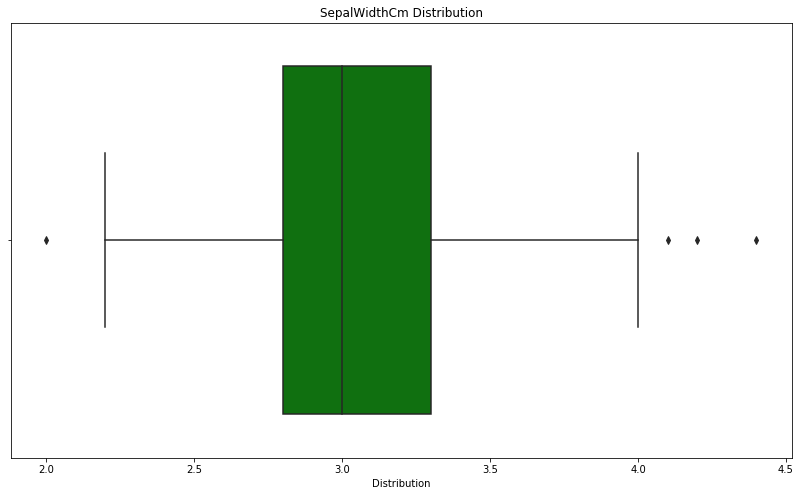

In [17]:
plt.figure(figsize=(14,8)) # defyning plotsize
sns.boxplot(iris_eda['SepalWidthCm'] # plotting boxplot
           ,color='green') # color
plt.xlabel('Distribution') # defyning xlabel title
plt.title('SepalWidthCm Distribution'); # defyning a title

# We can see the outliers in the box plot

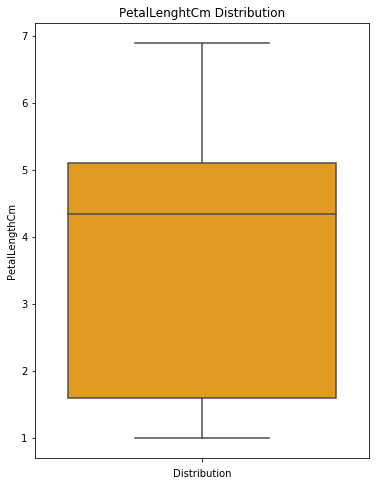

In [18]:
plt.figure(figsize=(6,8)) # defyning plotsize
sns.boxplot(iris_eda['PetalLengthCm'] # plotting boxplot
           ,color='orange'
           ,orient='v') # color
plt.xlabel('Distribution') # defyning xlabel title
plt.title('PetalLenghtCm Distribution'); # defyning a title

#### Now we have not outlayers and our mean are not centralized, then we have not a normal distribution on this variable

# Bar charts

A bar chart is a graph with rectangular bars. The graph usually compares different categories. Although the graphs can be plotted vertically (bars standing up) or horizontally (bars laying flat from left to right), the most usual type of bar graph is vertical. With a bar chart we can quicly undertand each category frequency and defyne if we need to perform a oversampling and undersampling to solve unbalance class problem

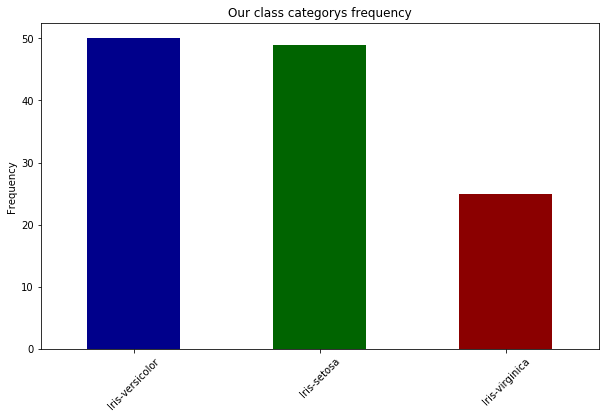

In [19]:
plt.figure(figsize=(10,6)) # difyning plot size
iris_eda['Species'][1:125].value_counts().plot(kind='bar' # here i use .value_counts() to count the frequency that each category occurs of dataset
                                    ,color=['darkblue','darkgreen','darkred']) #  counting category values and plotting

plt.ylabel('Frequency') # defyning ylabel title
plt.xticks(rotation=45) # defyning the angle of xlabel text
plt.title('Our class categorys frequency'); # difyning a title

# Piechart

Pie charts are generally used to show percentage or proportional data and usually the percentage represented by each category is provided next to the corresponding slice of pie. Pie charts are good for displaying data for around 6 categories or fewer.

See below a example showing the proportion of each category of Species variable from row 1 to 125:

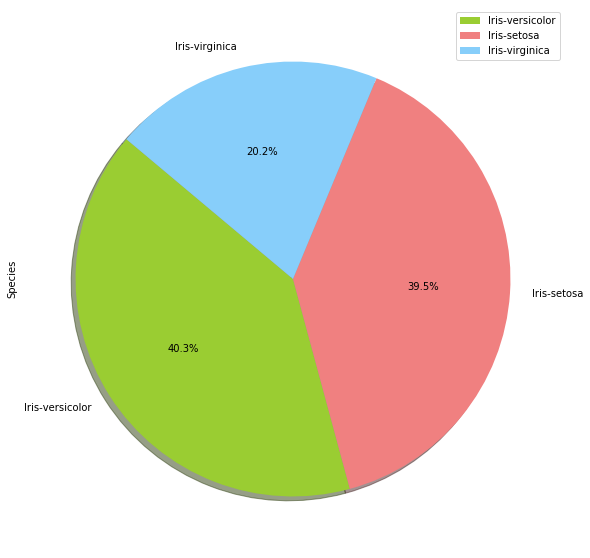

In [22]:
plt.figure(figsize=(10,10)) # difyning plot size
iris_eda['Species'][1:125].value_counts().plot(kind='pie' # here i use .value_counts() to count the frequency that each category occurs of dataset
                                    ,colors=['yellowgreen', 'lightcoral', 'lightskyblue'] # colors
                                          ,autopct='%1.1f%%',shadow=True, startangle=140) #  putting percentages
plt.legend(); # plotting the legend

# Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

# Scatterplot

A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

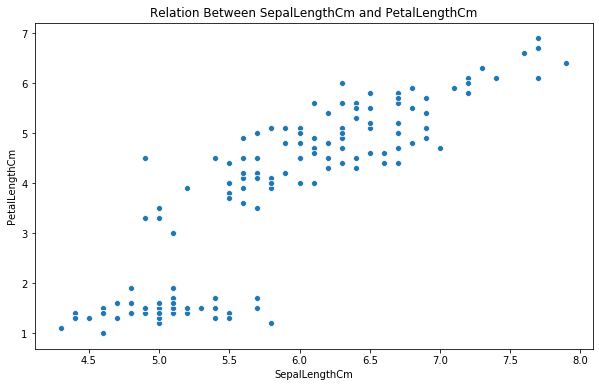

In [23]:
plt.figure(figsize=(10,6)) # defyning plotsize
sns.scatterplot(x='SepalLengthCm' # defynin x_axis
                ,y='PetalLengthCm' # defyning y_axis
               ,data=iris_eda) # defyning the data base
plt.title('Relation Between SepalLengthCm and PetalLengthCm');

Clearly seems to exist a positive correlation between the two variables, when SepalLengthCm grows the SepalWidthCm grows too, to confirm this let's do a lmplot using seaborn and draw a straight line throught our residuos

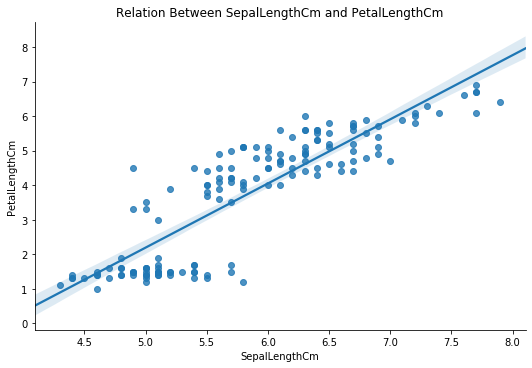

In [24]:
sns.lmplot(x='SepalLengthCm' # defynin x_axis
                ,y='PetalLengthCm' # defyning y_axis
               ,data=iris_eda # defyning the data base
          ,aspect=0.3*5) # defyning plotsize
plt.title('Relation Between SepalLengthCm and PetalLengthCm');

# Clustering Scatterplot

We can also 'clustering' a scatterplot by a determinate variable, with this simple action we can add value to a simple scatter plot and be capable of undertand much better our variable relations.

Let's start creating a scatterplot with SepalLengthCm and PetalLengthCm, then let's separate the residuos between Species using the parameter 'hue', with this simple scatterplot we can how see informations related to our class "Species", to SepalLengthCm and PetalLengthCm, as we can see below 'virginica' has bigger sepals and petals then 'setosa' and ' versicolor'.

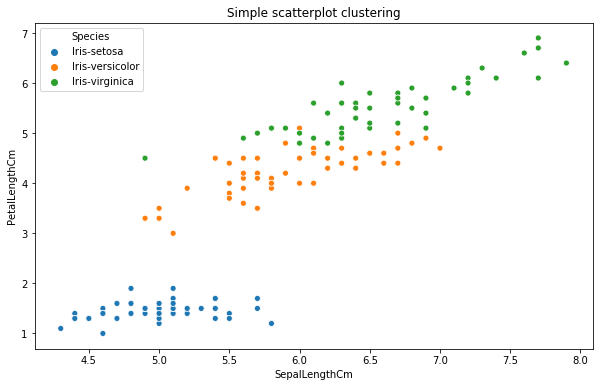

In [26]:
plt.figure(figsize=(10,6)) # defyning plotsize
sns.scatterplot(x="SepalLengthCm"
                , y="PetalLengthCm"
                , hue="Species" # defyning the variable to group our plot
                ,data=iris_eda)
plt.title('Simple scatterplot clustering');

We see above on bivariate analysis with scatter plots that SepalLengthCm and PetalLengthCm seems to have a great positve relation, but when SepalLength have less then 6 Cm and PetalLength less then 2 Cm this relation seems to be not soo good, if we want to separated this relations in diferent scatterplots grouping by Species? As we can see below, the relation between SepalLengthCm and PetalLengthCm in 'versicolor' and 'virginica' species are much more interesting and powerfull, 'setosa' also have a good relation, but not so good as 'versicolor' and 'virginica'.

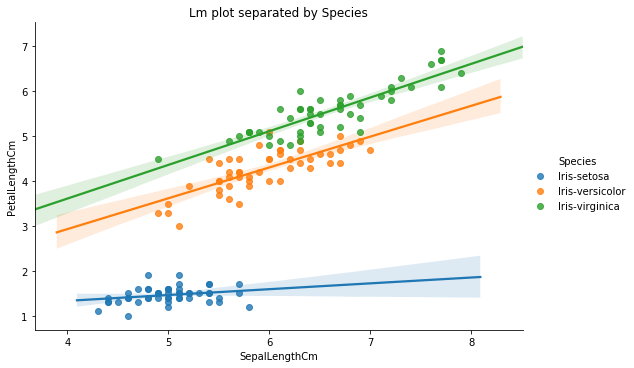

In [27]:
sns.lmplot(x='SepalLengthCm' # defynin x_axis
                ,y='PetalLengthCm' # defyning y_axis
           ,hue='Species' # defyning the variable to group our plot
               ,data=iris_eda # defyning the data base
          ,aspect=0.25*6) # defyning plotsize
plt.title('Lm plot separated by Species'); # defyning a title

We can also use pair plot with grouping, let's see below a pair plot of all numerical variables grouped by Species, with just a fell lines of code we can extract from our data insights from all variables using grouped scatterplots and density plots.

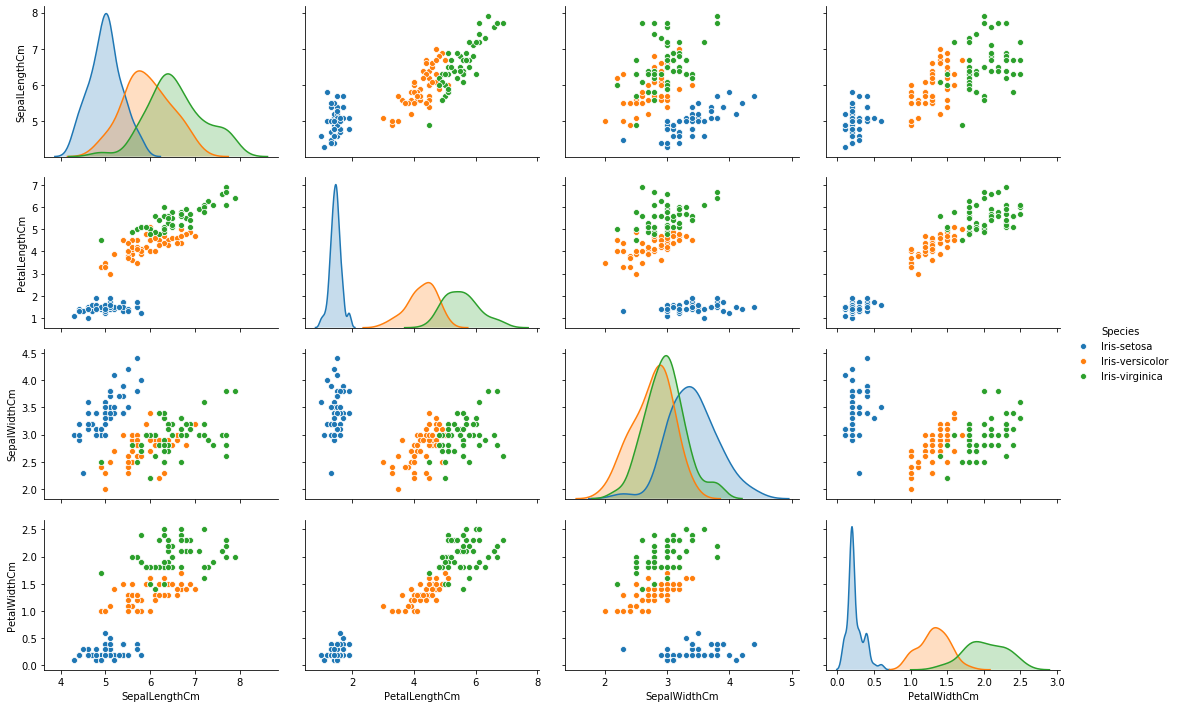

In [28]:
features = ['SepalLengthCm','PetalLengthCm' # selecting variables
          ,'SepalWidthCm','PetalWidthCm','Species']
sns.pairplot(iris_eda[features],hue='Species',aspect=0.3*5); # pair plot with numerical variables in iris dataset

# Correlation Analysis 

Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related. In other words, it is the process of studying the strength of that relationship with available statistical data. This technique is strictly connected to the linear regression analysis.

Let's start plotting a correlation matrix with all numerical variables in Iris dataset. As we can see below, PetalWithCm and PetalLengthCm have a strong positive correlation of 0.96 while PetalLengthCm and SepalWidthCm have a weak negative correlation, this correlation informations can be used on feature engineering to create another variables and try to eliminate this high correlated features.



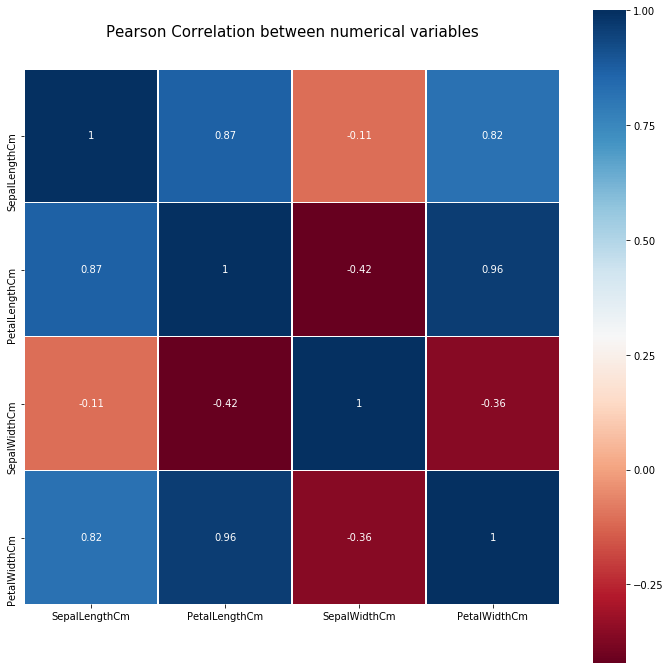

In [30]:
feature= ['SepalLengthCm','PetalLengthCm','SepalWidthCm','PetalWidthCm'] # selecting numerical variables to correlation plot

colormap = plt.cm.RdBu # defyning colormap
plt.figure(figsize=(12,12)) # difyning plot size
plt.title('Pearson Correlation between numerical variables', y=1.05, size=15) # defyning a title to our plot
sns.heatmap(iris_eda[feature].astype(float).corr(),linewidths=0.5,vmax=1, 
            square=True, cmap=colormap, linecolor='white', annot=True);